# Exploratory Spatial and Temporal Data Analysis (ESTDA) - Visualization
   

In [1]:
import matplotlib
import numpy as np
import pysal as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load example dataset in **pysal**: nominal per capita incomes observed annually from 1929 to 2009 for the lower 48 US states. Downloaded from [US Bureau of Economic Analysis](https://www.bea.gov).

In [2]:
pdUS = pd.read_csv(ps.examples.get_path('usjoin.csv'))
pdUS.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


In [3]:
pdUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 83 columns):
Name          48 non-null object
STATE_FIPS    48 non-null int64
1929          48 non-null int64
1930          48 non-null int64
1931          48 non-null int64
1932          48 non-null int64
1933          48 non-null int64
1934          48 non-null int64
1935          48 non-null int64
1936          48 non-null int64
1937          48 non-null int64
1938          48 non-null int64
1939          48 non-null int64
1940          48 non-null int64
1941          48 non-null int64
1942          48 non-null int64
1943          48 non-null int64
1944          48 non-null int64
1945          48 non-null int64
1946          48 non-null int64
1947          48 non-null int64
1948          48 non-null int64
1949          48 non-null int64
1950          48 non-null int64
1951          48 non-null int64
1952          48 non-null int64
1953          48 non-null int64
1954          48 non-null int64


## Visualization 

* Temporal dynamics

In [4]:
names = pdUS["Name"].values
names

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [5]:
years = range(1929,2010)
pd_pci = pdUS[map(str,years)]
pd_pci.head()

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,323,267,224,162,166,211,217,251,267,244,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,600,520,429,321,308,362,416,462,504,478,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,310,228,215,157,157,187,207,247,256,231,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,991,887,749,580,546,603,660,771,795,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,634,578,471,354,353,368,444,542,532,506,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


In [6]:
pd_pci.index = names
pd_pci.head()

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Alabama,323,267,224,162,166,211,217,251,267,244,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
Arizona,600,520,429,321,308,362,416,462,504,478,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
Arkansas,310,228,215,157,157,187,207,247,256,231,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
California,991,887,749,580,546,603,660,771,795,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
Colorado,634,578,471,354,353,368,444,542,532,506,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


In [7]:
pd_pci = pd_pci.T
pd_pci.head()

,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1929,323,600,310,991,634,1024,1032,518,347,507,...,426,378,479,551,634,434,741,460,673,675
1930,267,520,228,887,578,921,857,470,307,503,...,366,325,412,498,576,384,658,408,588,585
1931,224,429,215,749,471,801,775,398,256,374,...,241,277,348,369,474,370,534,356,469,476
1932,162,321,157,580,354,620,590,319,200,274,...,189,198,266,305,365,284,402,257,362,374
1933,166,308,157,546,353,583,564,288,204,227,...,129,204,257,298,338,285,376,259,333,371


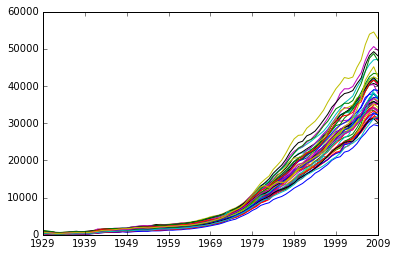

In [8]:
pd_pci.plot(legend=None)

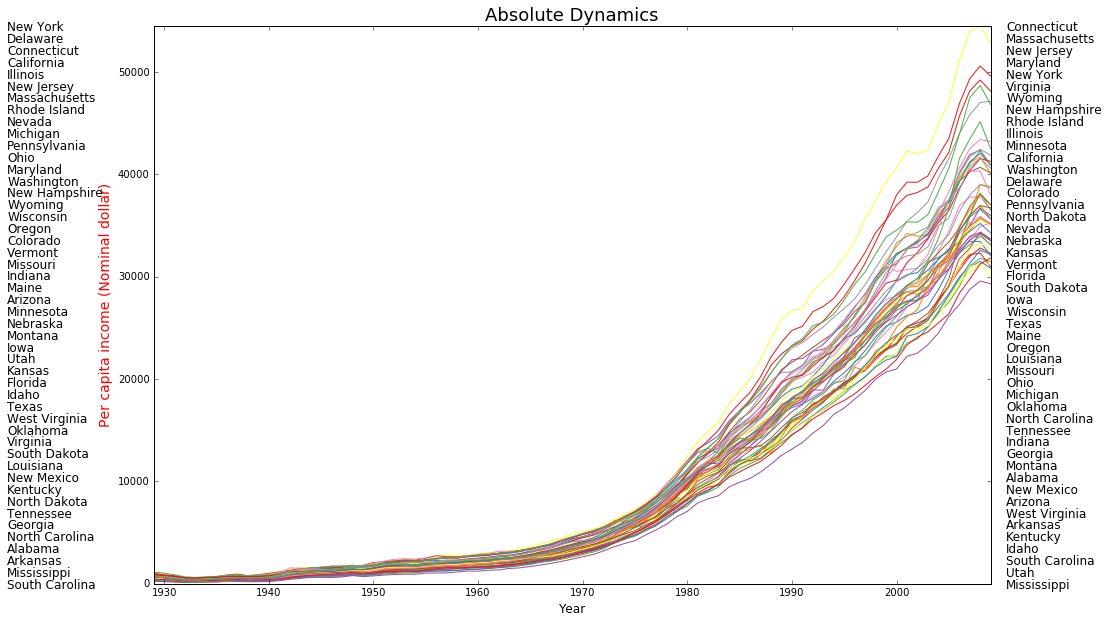

In [9]:
order1929 = np.argsort(pdUS["1929"])
order2009 = np.argsort(pdUS["2009"])
names1929 = names[order1929[::-1]]
names2009 = names[order2009[::-1]]
first_last = np.vstack((names[order1929[::-1]],names[order2009[::-1]]))
from pylab import rcParams
sns.set_palette(sns.color_palette("Set1", 2010-1929))
rcParams['figure.figsize'] = 15,10
plt.plot(years,pd_pci.as_matrix())
#pd_pci.plot(legend=None)
for i in range(48):
    plt.text(1915,pd_pci.values.max()-500-(i*1159), names1929[i],fontsize=12)
    plt.text(2010.5,pd_pci.values.max()-500-(i*1159), names2009[i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, pd_pci.values.max()))
plt.ylabel("Per capita income (Nominal dollar)",fontsize=14,color="r")
plt.xlabel('Year',fontsize=12)
plt.title('Absolute Dynamics',fontsize=18)

* Distribution dynamics

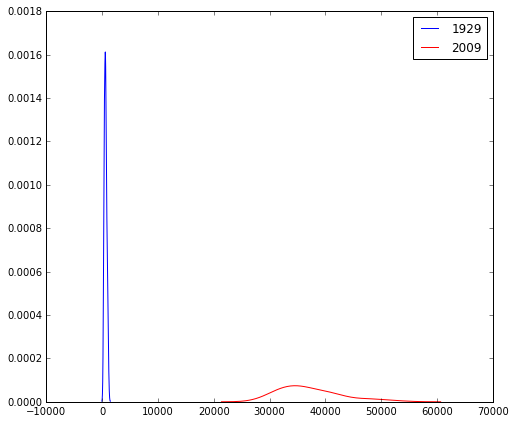

In [10]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.kdeplot(pdUS["1929"], color="b") 
sns.kdeplot(pdUS["2009"], color="R")
plt.legend()

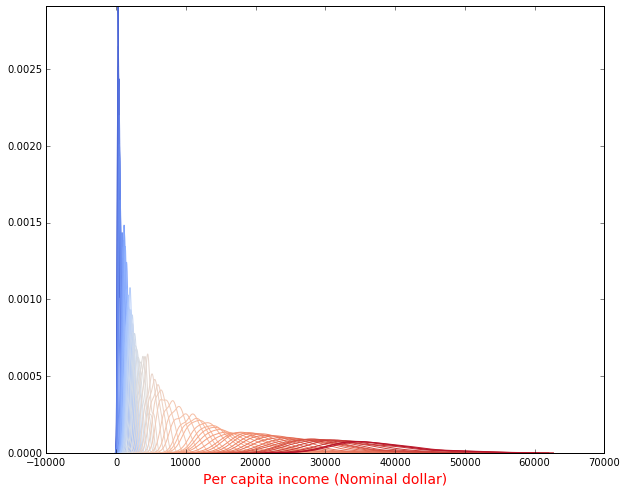

In [11]:
sns.set_palette(sns.color_palette("coolwarm", 2010-1929))
plt.figure(figsize=(10,8))
for i in range(2010-1929):
    sns.kdeplot(pd_pci.T[str(i+1929)],legend=False)
plt.xlabel("Per capita income (Nominal dollar)",fontsize=14,color="r")

Another way to visualize the dynamics of cross-sectional distributions - Joyplot

> **NOTE**: This material has been ported and adapted from [Joyplot](https://gist.github.com/sjsrey/f98977d78cdcacddc2f6a8891539cb80) by Serge Rey.

In [12]:
from seaborn.distributions import _statsmodels_univariate_kde
# Source http://nbviewer.jupyter.org/gist/ljwolf/37c89ddb704c013debb9d205c3acb25b
def joyplot(data, ax=None, 
            flatten = .1, #rescale the height of each distribution to avoid overlap. If large, will flatten out each of the KDEs
            linecolor='k', 
            shadecolor='w',
            shade=True, 
            line_kws = None,
            kde_kws=None,
            fig_kws=None,
            shade_kws=None):
    line_kws = dict() if line_kws is None else line_kws
    kde_kws = (dict(kernel='gau', bw='scott',
                         gridsize=100, cut=3,
                         clip=None) if kde_kws is None else kde_kws)
    fig_kws = dict(figsize=(5,5)) if fig_kws is None else fig_kws
    shade_kws = (dict(alpha=.75, 
                          clip_on=True, 
                          zorder=1, 
                          color=None) if shade_kws is None else shade_kws)
    if kde_kws.get('clip',None) is None:
        kde_kws['clip'] = (-np.inf, np.inf)
    if ax is None:
        f,ax = plt.subplots(1,1, **fig_kws)
    T,N = data.shape
    dsupport = np.array([])
    for i, row in enumerate(data):
        x,y = _statsmodels_univariate_kde(row, **kde_kws)
        y = np.max(np.c_[np.zeros_like(y), y], axis=1)
        y = y/(flatten*y.max()) + i
        ax.plot(x,y,color=linecolor,**line_kws)
        #print(y)
        if shade:
            if shade_kws.get('color', None) is None:
                shade_kws['color'] = shadecolor
            ax.fill_between(x, i, y, 
                             **shade_kws)
        dsupport = np.concatenate((dsupport, x))
    ax.set_xlim(np.min(dsupport)*.75, np.max(dsupport)*1.25)
    return f,ax

/Users/weikang/anaconda3/envs/workshop/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


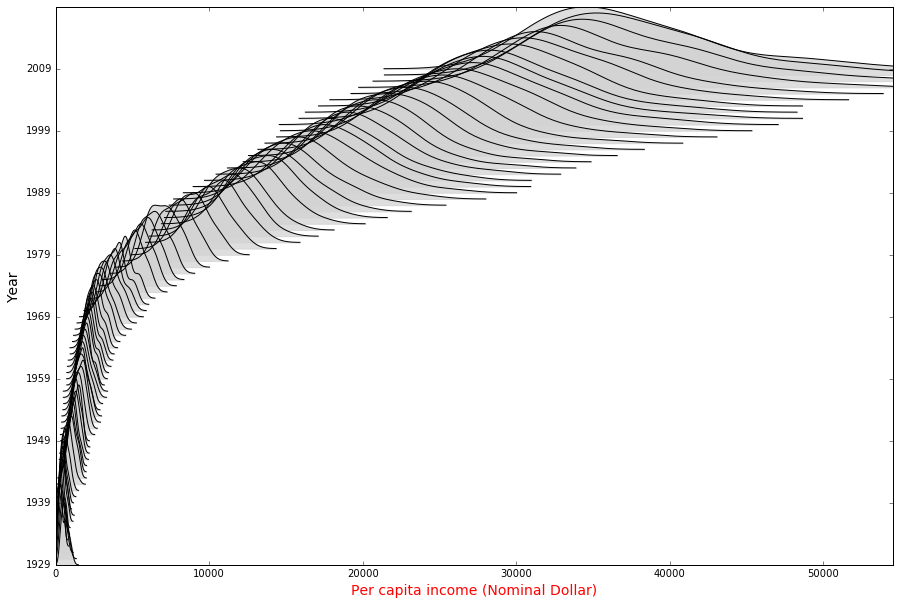

In [13]:
array_pci = pd_pci.as_matrix().astype(float)
xmin = array_pci.min()
xmax = array_pci.max()
f,ax = joyplot(array_pci, shade=True, shadecolor='lightgrey', linecolor='k', fig_kws=dict(figsize=(15,10))) 
ax.set_xlim(0, xmax)
ax.legend(ncol=2, fontsize=16)
ax.set_ylabel("Year",fontsize=14)
ax.set_xlabel("Per capita income (Nominal Dollar)",fontsize=14,color="r")
ax.set_yticks(range(0,9*10,10))
ax.set_yticklabels(range(1929,2010,10))
plt.show()

### Per capita income dynamics in constant dollar 2009 - structural mobility

We need to adjust for price change over years for a valid temporal comparison. First we acquire [Historical Consumer Price Index for All Urban Consumers (CPI-U)](https://www.bls.gov/cpi/tables/historical-cpi-u-201709.pdf) from [US Bureau of labor Statistics](https://www.bls.gov/home.htm). 


In [14]:
pd_cpi = pd.read_csv("data/CPI1913-2016.csv")
pd_cpi.head()

,year,cpi
0,1913,9.9
1,1914,10.0
2,1915,10.1
3,1916,10.9
4,1917,12.8


In [15]:
pd_cpi.index = pd_cpi["year"].as_matrix()
pd_cpi = pd_cpi.drop(["year"],axis=1)
pd_cpi.head()

,cpi
1913,9.9
1914,10.0
1915,10.1
1916,10.9
1917,12.8


In [16]:
pd_cpi2909 = pd_cpi.loc[years]
pd_cpi2909

,cpi
1929,17.100
1930,16.700
1931,15.200
1932,13.700
1933,13.000
1934,13.400
1935,13.700
1936,13.900
1937,14.400
1938,14.100


In [17]:
deflator = (pd_cpi2909.loc[2009]/pd_cpi2909).T.values[0]
deflator

array([ 12.54602339,  12.84652695,  14.11427632,  15.65963504,
        16.50284615,  16.01022388,  15.65963504,  15.43431655,
        14.89840278,  15.21539007,  15.43431655,  15.32407143,
        14.59435374,  13.16177914,  12.40098266,  12.18960227,
        11.91872222,  11.00189744,   9.62049327,   8.90195021,
         9.01415966,   8.90195021,   8.25142308,   8.09573585,
         8.03509363,   7.97535316,   8.00511194,   7.88738971,
         7.63476868,   7.42342561,   7.3724055 ,   7.24787162,
         7.1751505 ,   7.10387417,   7.01101307,   6.92054839,
         6.81069841,   6.62151235,   6.42326347,   6.16485632,
         5.84569482,   5.52930412,   5.29720988,   5.13246411,
         4.83191441,   4.35166329,   3.98767658,   3.77042179,
         3.54021452,   3.29044479,   2.9550551 ,   2.60360437,
         2.36014301,   2.22318135,   2.15398594,   2.06484119,
         1.99383829,   1.95745438,   1.88852993,   1.81349958,
         1.7301371 ,   1.64144606,   1.57516153,   1.52

In [18]:
real_2909 = np.dot(np.diag(deflator),pd_pci.values)
real_2909

array([[  4052.36555556,   7527.61403509,   3889.26725146, ...,
          5771.17076023,   8443.47374269,   8468.56578947],
       [  3430.02269461,   6680.19401198,   2929.00814371, ...,
          5241.38299401,   7553.75784431,   7515.21826347],
       [  3161.59789474,   6055.02453947,   3034.56940789, ...,
          5024.68236842,   6619.59559211,   6718.39552632],
       ..., 
       [ 33098.01948472,  34631.44654725,  32148.16385489, ...,
         30802.0176954 ,  37082.65350484,  44960.86784636],
       [ 32702.237326  ,  33326.01015778,  31686.86270047, ...,
         31153.76611102,  36463.8067189 ,  45016.27032136],
       [ 32274.        ,  32077.        ,  31493.        , ...,
         31843.        ,  35676.        ,  42504.        ]])

In [19]:
pd_real_2909 = pdUS.copy()
for year in years:
    pd_real_2909[str(year)] = real_2909[year-1929,:]
pd_real_2909.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,4052.365556,3430.022695,3161.597895,2536.860876,2739.472462,3378.157239,3398.140803,3874.013453,...,29241.567520,29639.055782,30005.366631,30390.798397,31419.619402,31963.047051,32599.833621,33098.019485,32702.237326,32274.0
1,Arizona,4,7527.614035,6680.194012,6055.024539,5026.742847,5082.876615,5795.701045,6514.408175,7130.654245,...,31866.593415,31777.157448,31565.202073,31604.564793,32655.279836,33692.085648,34640.914802,34631.446547,33326.010158,32077.0
2,Arkansas,5,3889.267251,2929.008144,3034.569408,2458.562701,2590.946846,2993.911866,3241.544453,3812.276187,...,27729.094129,28506.407024,28536.163830,29235.330098,30056.758629,30221.924956,30904.608219,32148.163855,31686.862700,31493.0
3,California,6,12433.109181,11394.869401,10571.592961,9082.588321,9010.554000,9654.165000,10335.359124,11899.858058,...,40210.114257,39672.991248,39234.392996,39410.680092,40503.086453,41153.095909,42746.710084,43398.469152,42226.232096,40902.0
4,Colorado,8,7954.178830,7425.292575,6647.824145,5543.510803,5825.504692,5891.762388,6952.877956,8365.399568,...,41049.823537,41463.424257,40502.057426,39749.975022,40366.800376,41070.708428,42207.175069,42593.471680,41570.573113,40093.0


In [20]:
pd_real_2909.to_csv("data/US_state_pci_constant09_1929_2009.csv")

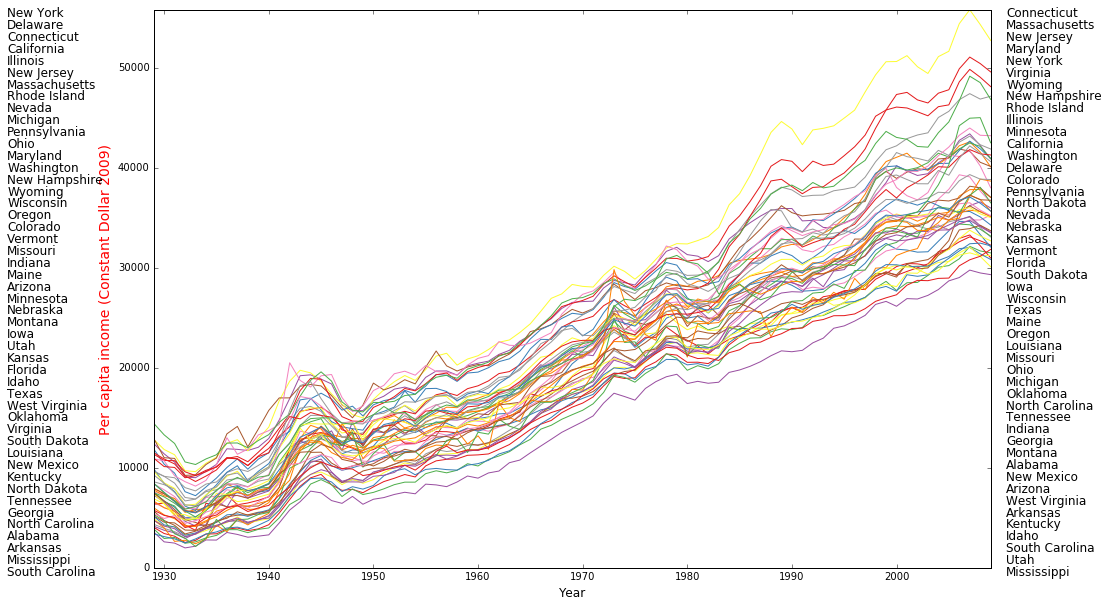

In [21]:
from pylab import rcParams
sns.set_palette(sns.color_palette("Set1", 2010-1929))
rcParams['figure.figsize'] = 15,10
plt.plot(years,real_2909)
#pd_pci.plot(legend=None)
for i in range(48):
    plt.text(1915,real_2909.max()-700-(i*1189), names1929[i],fontsize=12)
    plt.text(2010.5,real_2909.max()-700-(i*1189), names2009[i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, real_2909.max()))
plt.ylabel(r"$y_{i,t}$",fontsize=14)
plt.ylabel("Per capita income (Constant Dollar 2009)",fontsize=14,color="r")
plt.xlabel('Year',fontsize=12)


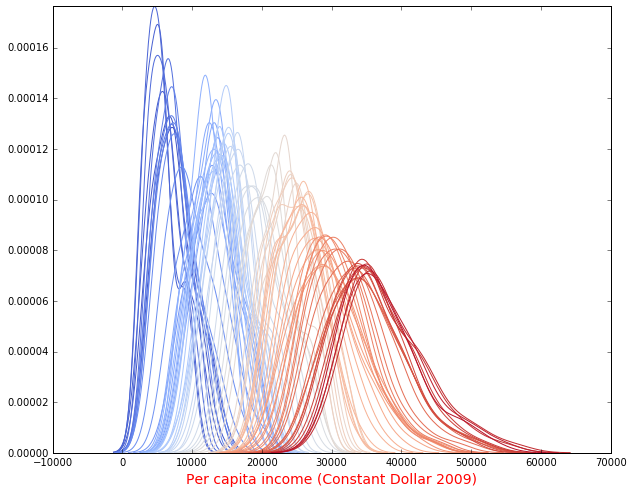

In [22]:
sns.set_palette(sns.color_palette("coolwarm", 2010-1929))
plt.figure(figsize=(10,8))
plt.xlabel("Per capita income (Constant Dollar 2009)",fontsize=14,color="r")
for i in range(2010-1929):
    sns.kdeplot(real_2909[i],legend=False)

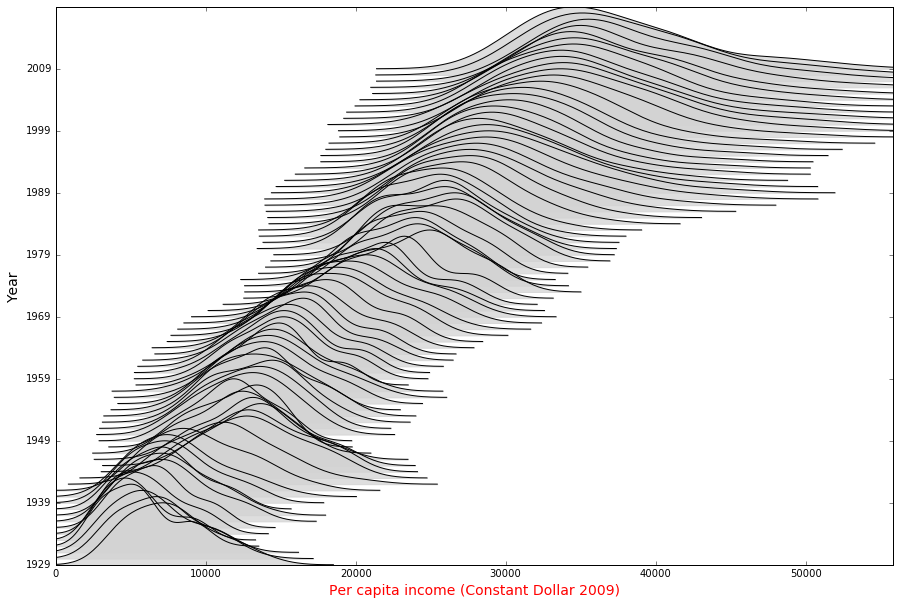

In [23]:
xmin = real_2909.min()
xmax = real_2909.max()
f,ax = joyplot(real_2909, shade=True, shadecolor='lightgrey', linecolor='k', fig_kws=dict(figsize=(15,10))) 
ax.set_xlim(0, xmax)
ax.legend(ncol=2, fontsize=16)
ax.set_ylabel("Year",fontsize=14)
ax.set_xlabel("Per capita income (Constant Dollar 2009)",fontsize=14,color="r")
ax.set_yticks(range(0,9*10,10))
ax.set_yticklabels(range(1929,2010,10))
plt.show()

### Relative per capita income dynamics - exchange mobility

In [24]:
mean = pd_pci.values.mean(axis=1)
mean.shape = (len(mean),1)

In [25]:
rpci = pd_pci.values/mean
rpci

array([[ 0.5250254 ,  0.97527938,  0.50389434, ...,  0.74771419,
         1.09393837,  1.0971893 ],
       [ 0.49080882,  0.95588235,  0.41911765, ...,  0.75      ,
         1.08088235,  1.07536765],
       [ 0.49080203,  0.93997352,  0.4710823 , ...,  0.78002465,
         1.02761674,  1.04295431],
       ..., 
       [ 0.86148267,  0.90139505,  0.83675961, ...,  0.80172182,
         0.96519561,  1.17025154],
       [ 0.86252252,  0.87897455,  0.83574199, ...,  0.82168155,
         0.96173403,  1.18730553],
       [ 0.86746356,  0.86216858,  0.84647177, ...,  0.85587911,
         0.95890284,  1.14242645]])

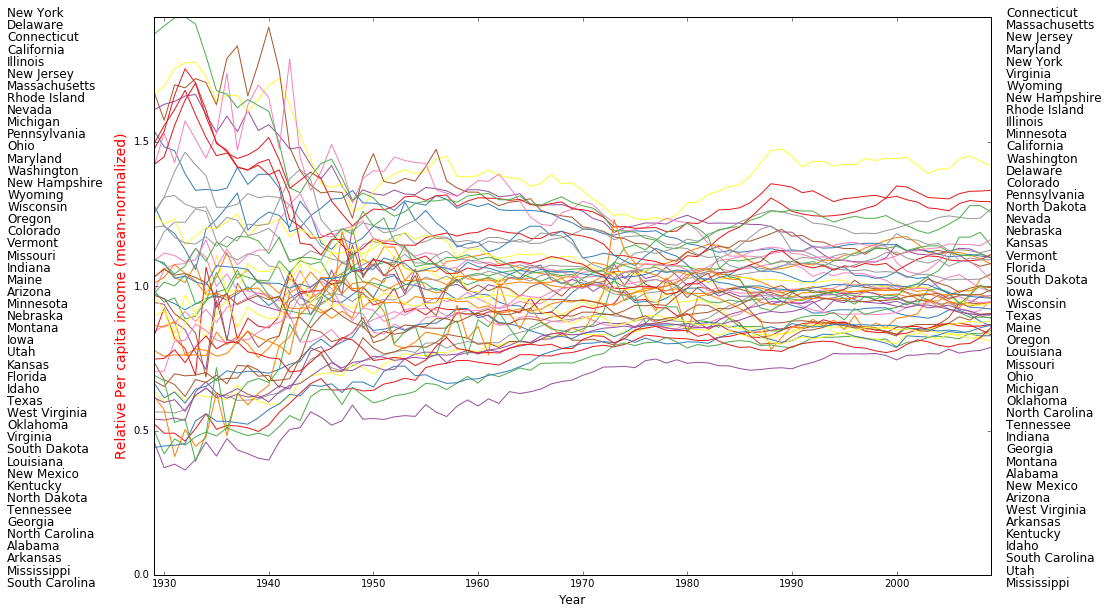

In [26]:
from pylab import rcParams
sns.set_palette(sns.color_palette("Set1", 2010-1929))
rcParams['figure.figsize'] = 15,10
plt.plot(years,rpci)
#pd_pci.plot(legend=None)
for i in range(48):
    plt.text(1915,rpci.max()-(i*0.042), names1929[i],fontsize=12)
    plt.text(2010.5,rpci.max()-(i*0.042), names2009[i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, rpci.max()))
plt.ylabel("Relative Per capita income (mean-normalized)",fontsize=14,color="r")
plt.xlabel('Year',fontsize=12)

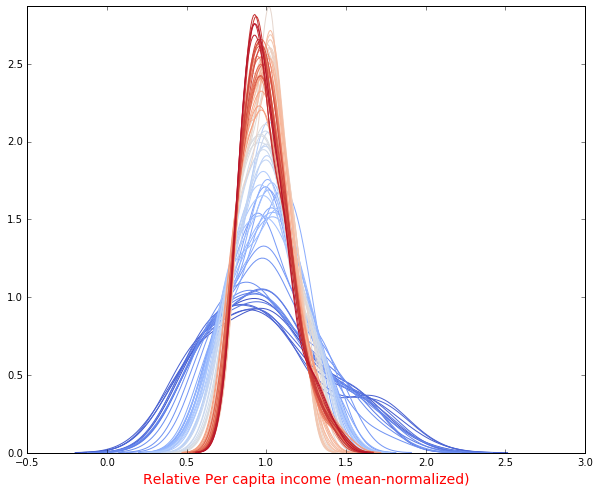

In [27]:
sns.set_palette(sns.color_palette("coolwarm", 2010-1929))
plt.figure(figsize=(10,8))
for i in range(2010-1929):
    sns.kdeplot(rpci[i],legend=False)
plt.xlabel("Relative Per capita income (mean-normalized)",fontsize=14,color="r")

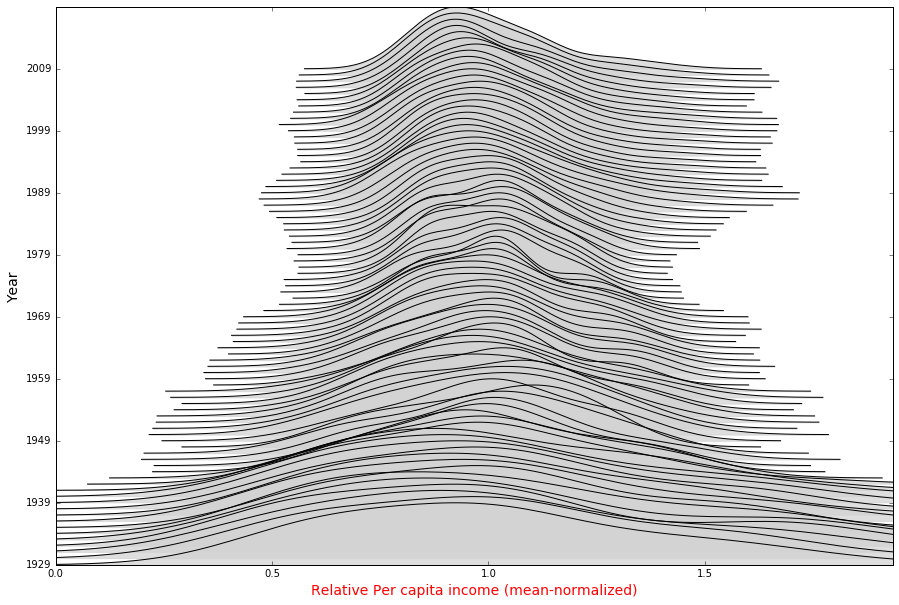

In [28]:
xmin = rpci.min()
xmax = rpci.max()
f,ax = joyplot(rpci, shade=True, shadecolor='lightgrey', linecolor='k', fig_kws=dict(figsize=(15,10))) 
ax.set_xlim(0, xmax)
ax.legend(ncol=2, fontsize=16)
ax.set_ylabel("Year",fontsize=14)
ax.set_xlabel("Relative Per capita income (mean-normalized)",fontsize=14,color="r")
ax.set_yticks(range(0,9*10,10))
ax.set_yticklabels(range(1929,2010,10))
plt.show()

### Spatial-temporal dynamics visualization

In [29]:
from pysal.contrib.viz import mapping as maps
data_table = ps.pdio.read_files(ps.examples.get_path('us48.shp'))
#income_table = pd.read_csv(ps.examples.get_path("usjoin.csv"))
complete_table = data_table.merge(pdUS,left_on='STATE_NAME',right_on='Name')
complete_table.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,<pysal.cg.shapes.Polygon object at 0x122a95d90>,Washington,...,31528,32053,32206,32934,34984,35738,38477,40782,41588,40619
1,45.132,34.527,2,2,Montana,30,Mtn,MT,<pysal.cg.shapes.Polygon object at 0x122a95e90>,Montana,...,22569,24342,24699,25963,27517,28987,30942,32625,33293,32699
2,9.571,18.899,3,3,Maine,23,N Eng,ME,<pysal.cg.shapes.Polygon object at 0x122a95f10>,Maine,...,25623,27068,27731,28727,30201,30721,32340,33620,34906,35268
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,<pysal.cg.shapes.Polygon object at 0x122a95fd0>,North Dakota,...,25068,26118,26770,29109,29676,31644,32856,35882,39009,38672
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,<pysal.cg.shapes.Polygon object at 0x122abe090>,South Dakota,...,26115,27531,27727,30072,31765,32726,33320,35998,38188,36499


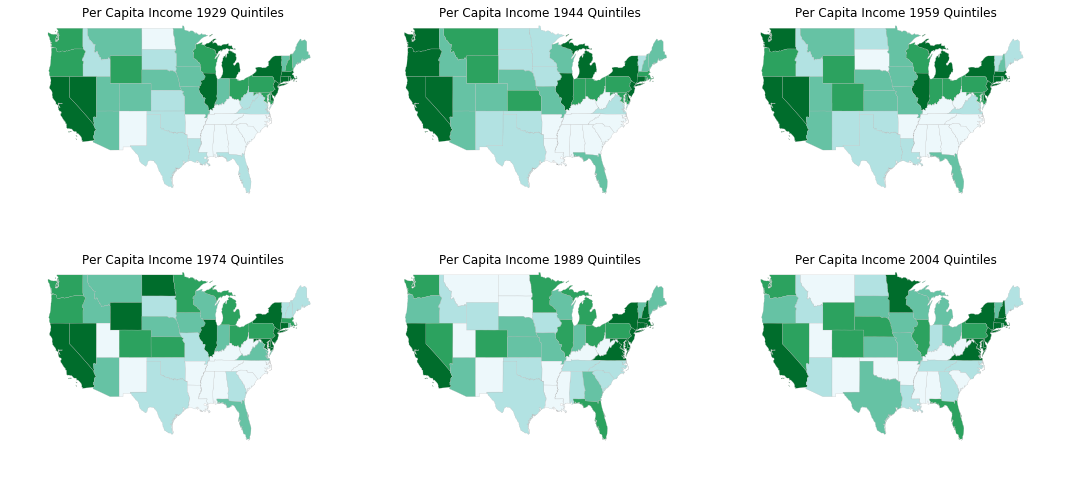

In [30]:
index_year = range(1929,2010,15)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (15,7))
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        maps.geoplot(complete_table, col=str(index_year[i*3+j]),ax=ax,classi="Quantiles")
        ax.set_title('Per Capita Income %s Quintiles'%str(index_year[i*3+j]))
plt.tight_layout()